Show how channels correspond to frequency

In [1]:

from MkidsSoc import *
mkidsSoc = MkidsSoc(force_init_clks=False)

In [2]:
import importlib
import Mkids
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)


In [3]:
mkids.setFMixer(123.45)

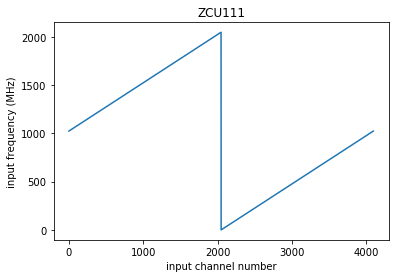

In [4]:
allInChs = np.arange(mkids.nInCh)
allInFreqs = mkids.inCh2FreqCenter(allInChs)
testAllInChs, testOffsets = mkids.inFreq2chOffset(allInFreqs)
plt.plot(allInChs, allInFreqs)
plt.xlabel("input channel number")
plt.ylabel("input frequency (MHz)")
_ = plt.title(mkids.board)

In [5]:
# Should be True, since we converted from channel to frequncy and back to channel 
np.array_equal(allInChs, testAllInChs)

True

In [6]:
# Should be True, since the freqencies calculate from channel number are at the center of the channel
np.allclose(testOffsets, np.zeros(mkids.nInCh))

True

In [7]:
# Set the mixer to the center of the input band
fMixer = mkids.fsIn/2
mkids.setFMixer(fMixer)


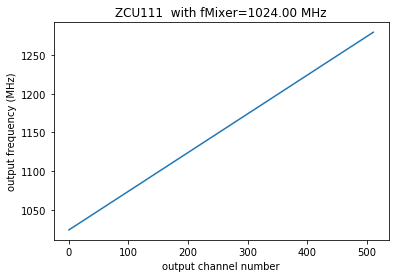

In [8]:
allOutChs = np.arange(mkids.nOutCh)
allOutFreqs = mkids.inCh2FreqCenter(allOutChs)
testAllOutChs, testOffsets = mkids.inFreq2chOffset(allOutFreqs)
plt.plot(allOutChs, allOutFreqs)
plt.xlabel("output channel number")
plt.ylabel("output frequency (MHz)")
_ = plt.title("%s  with fMixer=%.2f MHz"%(mkids.board, mkids.fMixerQuantized))

In [9]:
# Should be True, since we converted from channel to frequncy and back to channel 
np.array_equal(allOutChs, testAllOutChs)

True

In [10]:
# Should be True, since the freqencies calculate from channel number are at the center of the channel
np.allclose(testOffsets, np.zeros(mkids.nOutCh))

True